<a href="https://colab.research.google.com/github/smathews88/machine_learning/blob/main/03_ml_decision_tree_loan_repayment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Repayment prediction**

---



In this notebook we are going to predict loan repayment by a customer using decision tree.

# **Import Libraries**

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Dataset and Extract depentend and independent variables**

In [392]:
df_loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/loan_train.csv')
df_loan.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# **Data Exploration and Analysis**

In [393]:
df_loan["loan_status"].unique() , df_loan["education"].unique(), df_loan["Gender"].unique()

(array(['PAIDOFF', 'COLLECTION'], dtype=object),
 array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
       dtype=object),
 array(['male', 'female'], dtype=object))

In [394]:
df_loan.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: proportion, dtype: float64

In [395]:
df_loan.groupby(['Principal'])['loan_status'].value_counts(normalize=True)

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
800        PAIDOFF        0.777778
           COLLECTION     0.222222
900        PAIDOFF        1.000000
1000       PAIDOFF        0.736434
           COLLECTION     0.263566
Name: proportion, dtype: float64

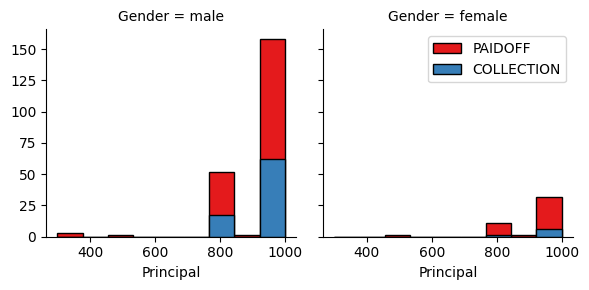

In [396]:
import seaborn as sns

bins = np.linspace(df_loan.Principal.min(), df_loan.Principal.max(), 10)
g = sns.FacetGrid(df_loan, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

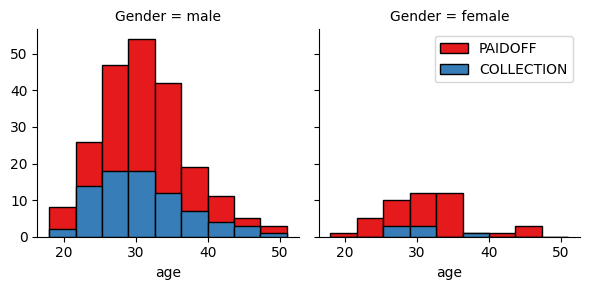

In [397]:
bins = np.linspace(df_loan.age.min(), df_loan.age.max(), 10)
g = sns.FacetGrid(df_loan, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# **Data pre-processing**

In [398]:
df_loan.drop(df_loan.columns[[0,1]], axis = 1, inplace=True)
df_loan.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [399]:
df_loan.shape

(346, 8)

In [400]:
df_loan.drop_duplicates(inplace=True)
df_loan.shape

(306, 8)

In [401]:
df_loan.dropna(inplace=True)
df_loan.shape

(306, 8)

In [402]:
df_loan['effective_date'] = pd.to_datetime(df_loan['effective_date'])
df_loan['effective_date_dayofweek'] = df_loan['effective_date'].dt.dayofweek
df_loan['effective_date_weekend'] = df_loan['effective_date_dayofweek'].apply(lambda x: 1 if (x>3 or x==0)  else 0)
df_loan['due_date'] = pd.to_datetime(df_loan['due_date'])
df_loan['due_date_dayofweek'] = df_loan['due_date'].dt.dayofweek
df_loan['due_date_weekend'] = df_loan['due_date_dayofweek'].apply(lambda x: 1 if (x>3 or x==0)  else 0)
df_loan.drop(['due_date', 'effective_date','effective_date_dayofweek','due_date_dayofweek'], axis=1, inplace=True)

df_loan.head()

,loan_status,Principal,terms,age,education,Gender,effective_date_weekend,due_date_weekend
0,PAIDOFF,1000,30,45,High School or Below,male,0,1
1,PAIDOFF,1000,30,33,Bechalor,female,0,1
2,PAIDOFF,1000,15,27,college,male,0,0
3,PAIDOFF,1000,30,28,college,female,1,1
4,PAIDOFF,1000,30,29,college,male,1,1


# **One Hot Encoding and Normalization**

In [403]:
df_loan['loan_status'] = df_loan['loan_status'].apply(lambda x: 1 if (x=="PAIDOFF")  else 0)
y = df_loan['loan_status']
df_loan.drop(['loan_status'], axis=1, inplace=True)
#df_loan['Gender'] = df_loan['Gender'].apply(lambda x: 1 if (x=="Male")  else 0)


In [440]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
     (OneHotEncoder(), ['education','Gender','effective_date_weekend','due_date_weekend']),
     (MinMaxScaler(),['Principal', 'terms', 'age']),
     remainder='passthrough')
encodig = ct.fit(df_loan)
df_loan_transformed = ct.transform(df_loan)
X = df_loan_transformed
encodig

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['education', 'Gender',
                                  'effective_date_weekend',
                                  'due_date_weekend']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['Principal', 'terms', 'age'])])

,onehotencoder__education_Bechalor,onehotencoder__education_High School or Below,onehotencoder__education_Master or Above,onehotencoder__education_college,onehotencoder__Gender_female,onehotencoder__Gender_male,onehotencoder__effective_date_weekend_0,onehotencoder__effective_date_weekend_1,onehotencoder__due_date_weekend_0,onehotencoder__due_date_weekend_1,minmaxscaler__Principal,minmaxscaler__terms,minmaxscaler__age
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,1.000000,0.818182
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.000000,0.454545
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.000000,0.347826,0.272727
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.000000,1.000000,0.303030
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,1.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,1.000000,0.242424
302,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.714286,0.347826,0.424242
303,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.714286,0.347826,0.636364
304,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,1.000000,0.303030


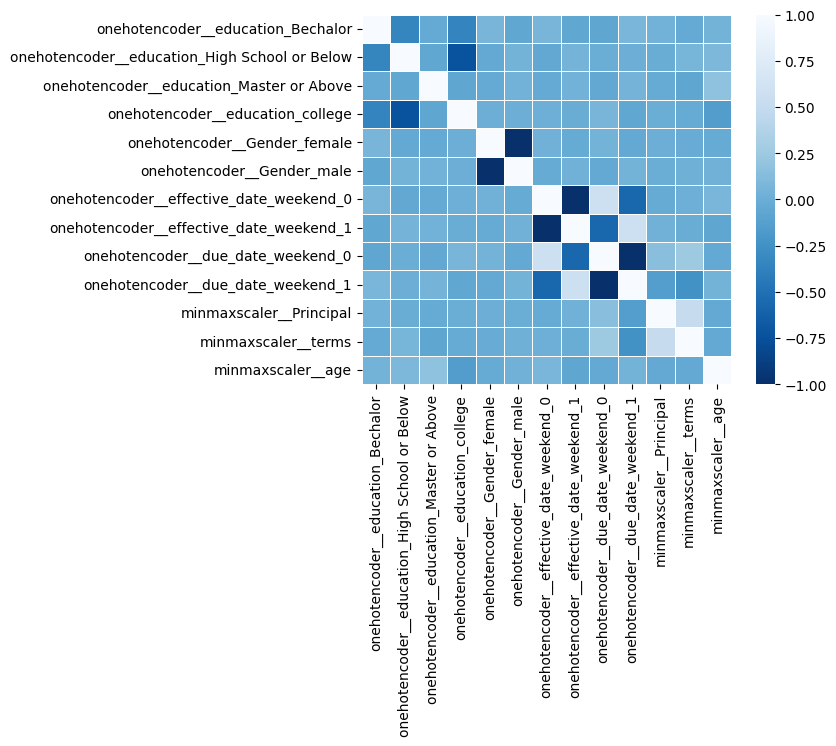

In [442]:
df_loan_transformed = pd.DataFrame(
    data=df_loan_transformed,
    columns=encodig.get_feature_names_out()
)
cr = df_loan_transformed.corr()
s = sns.heatmap(cr, fmt = ".3f", linewidths=.5, square = True, cmap = plt.cm.Blues_r)
df_loan_transformed

# **Create Test and Train Set**

In [405]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

[[1.         0.         0.         ... 1.         0.34782609 0.3030303 ]
 [0.         0.         0.         ... 0.71428571 0.34782609 0.42424242]
 [0.         1.         0.         ... 1.         0.34782609 0.81818182]
 ...
 [0.         0.         0.         ... 0.71428571 0.34782609 0.15151515]
 [0.         0.         0.         ... 1.         0.34782609 0.48484848]
 [0.         0.         0.         ... 1.         0.34782609 0.39393939]] [[0.         1.         0.         0.         0.         1.
  1.         0.         1.         0.         0.71428571 0.34782609
  0.48484848]
 [0.         1.         0.         0.         0.         1.
  0.         1.         0.         1.         1.         0.34782609
  0.27272727]
 [0.         1.         0.         0.         0.         1.
  0.         1.         0.         1.         0.71428571 0.34782609
  0.33333333]
 [0.         0.         0.         1.         1.         0.
  1.         0.         1.         0.         1.         1.
  0.424242

((244, 13), (62, 13), (244,), (62,))

# **Create Model**

In [418]:
#Fitting the Dataset into Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=5)
ml = model.fit(X_train,y_train)

# **Evaluate Model**

In [419]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_11 <= 0.17
|   |   |--- class: 1
|   |--- feature_11 >  0.17
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_11 <= 0.67
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.67
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_12 <= 0.44
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  0.44
|   |   |   |   |--- class: 1



In [420]:
y_pred = model.predict(X_test)
y_pred, np.array(y_test)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]))

In [421]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_dt = accuracy_score(y_pred,y_test)
confusion_dt = confusion_matrix(y_pred,y_test)
print('Accuracy Score= ',accuracy_dt)
print('confusion_matrix= \n',confusion_dt)

Accuracy Score=  0.6612903225806451
confusion_matrix= 
 [[ 6 11]
 [10 35]]


[Text(0.4230769230769231, 0.9166666666666666, 'x[7] <= 0.5\nentropy = 0.818\nsamples = 244\nvalue = [62, 182]'),
 Text(0.34615384615384615, 0.75, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.5, 0.75, 'x[11] <= 0.174\nentropy = 0.89\nsamples = 202\nvalue = [62, 140]'),
 Text(0.4230769230769231, 0.5833333333333334, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5769230769230769, 0.5833333333333334, 'x[8] <= 0.5\nentropy = 0.909\nsamples = 191\nvalue = [62, 129]'),
 Text(0.3076923076923077, 0.4166666666666667, 'x[11] <= 0.674\nentropy = 0.946\nsamples = 154\nvalue = [56, 98]'),
 Text(0.15384615384615385, 0.25, 'x[4] <= 0.5\nentropy = 0.847\nsamples = 84\nvalue = [23, 61]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.903\nsamples = 69\nvalue = [22, 47]'),
 Text(0.23076923076923078, 0.08333333333333333, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]'),
 Text(0.46153846153846156, 0.25, 'x[0] <= 0.5\nentropy = 0.998\nsamples = 70\nvalue = [33, 37]'),
 

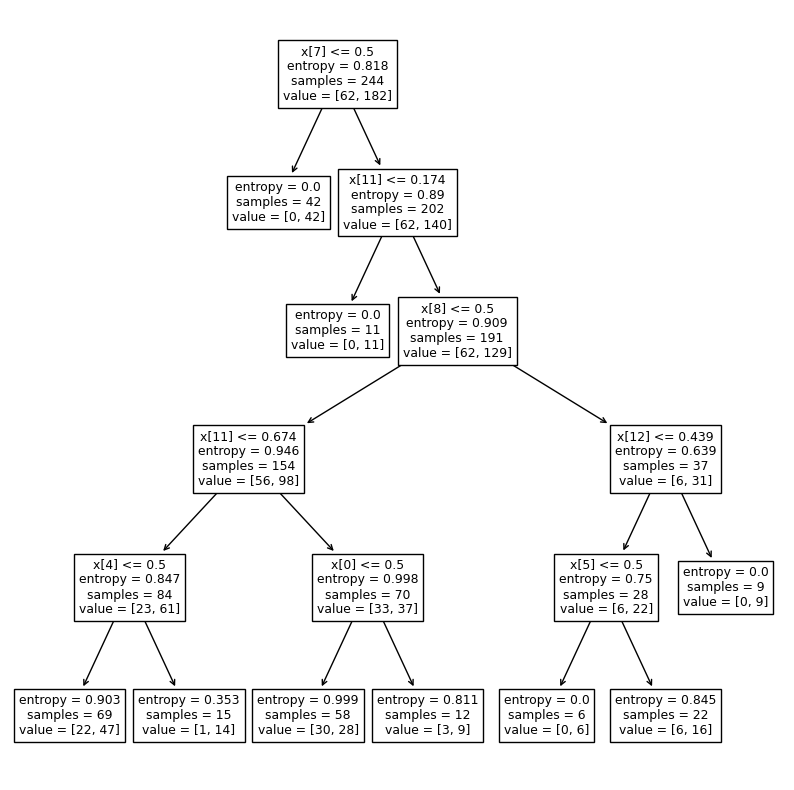

In [422]:
plt.figure(figsize=(10,10))

tree.plot_tree(ml)